# Data Import

In [556]:
import pandas as pd

In [557]:
demographics=pd.read_csv(r".\Case Study-20221206T200442Z-001\Case Study\demographics.csv")
enrollment=pd.read_csv(r".\Case Study-20221206T200442Z-001\Case Study\enrollment.csv")
log=pd.read_csv(r".\Case Study-20221206T200442Z-001\Case Study\log.csv")
truth=pd.read_csv(r".\Case Study-20221206T200442Z-001\Case Study\truth.csv")
test=pd.read_csv(r".\Case Study-20221206T200442Z-001\Case Study\test.csv")
zip=pd.read_csv(r".\Case Study-20221206T200442Z-001\Case Study\zip.csv")

# additional table
state_region_mapping=pd.read_csv(r".\Case Study-20221206T200442Z-001\Case Study\State_Region_Mapping.csv")

# Data Quality Checks

In [558]:
# Null analysis
demographics.isnull().sum()

username                 0
gender               13884
zip                      0
highest_education        0
dtype: int64

In [559]:
enrollment.isnull().sum()

enrollment_id    0
username         0
course_id        0
dtype: int64

In [560]:
log.isnull().sum()

enrollment_id    0
time             0
source           0
event            0
object           0
dtype: int64

In [561]:
truth.isnull().sum()

enrollment_id    0
dropout_flg      0
dtype: int64

In [562]:
test.isnull().sum()

enrollment_id       0
dropout_flg      1000
dtype: int64

In [563]:
zip.isnull().sum()

Zipcode                    0
ZipCodeType                0
City                       0
State                      0
LocationType               0
Lat                      648
Long                     648
Location                   1
Decommisioned              0
TaxReturnsFiled        13643
EstimatedPopulation    13643
TotalWages             13678
dtype: int64

In [564]:
state_region_mapping.isnull().sum()

State         0
State Code    0
Region        0
Division      0
dtype: int64

In [565]:
# Creating the base data to create the analytical base table

In [566]:
base_data=truth.append(test)

In [567]:
len(base_data)
# This sums up the total enrollments observed during EDA

72394

In [568]:
base_data.head(2)

,enrollment_id,dropout_flg
0,4,0.0
1,5,0.0


In [569]:
base_data['dropout_flg'].value_counts()
# This is from the truth table alone

1.0    56571
0.0    14823
Name: dropout_flg, dtype: int64

In [570]:
# Now we need to get each enrollment's geographical features
enrollment=pd.merge(enrollment, demographics, on='username',how='inner')

In [571]:
enrollment.head(2)

,enrollment_id,username,course_id,gender,zip,highest_education
0,4,FIHlppZyoq8muPbdVxS44gfvceX9zvU7,DPnLzkJJqOOPRJfBxIHbQEERiYHu5ila,male,32821,some college
1,1112,FIHlppZyoq8muPbdVxS44gfvceX9zvU7,AXUJZGmZ0xaYSWazu8RQ1G5c76ECT1Kd,male,32821,some college


In [572]:
# creating new calculated field --> tax_returns_per_person
zip['proportion_tax_filed']=zip['TaxReturnsFiled']/zip['EstimatedPopulation']

In [573]:
# creating new calculated field --> wage_per_person
zip['wage_per_person']=zip['TotalWages']/zip['EstimatedPopulation']

In [574]:
zip.head(2)

,Zipcode,ZipCodeType,City,State,LocationType,Lat,Long,Location,Decommisioned,TaxReturnsFiled,EstimatedPopulation,TotalWages,proportion_tax_filed,wage_per_person
0,705,STANDARD,AIBONITO,PR,PRIMARY,18.14,-66.26,NA-US-PR-AIBONITO,False,NaN,NaN,NaN,NaN,NaN
1,610,STANDARD,ANASCO,PR,PRIMARY,18.28,-67.14,NA-US-PR-ANASCO,False,NaN,NaN,NaN,NaN,NaN


In [575]:
zip=zip[zip['Decommisioned']==False]

In [576]:
# Consider only United States based locations

In [577]:
zip=pd.merge(zip, state_region_mapping[["State","State Code"]], left_on='State',right_on='State Code',how='inner')

In [578]:
len(zip)# united state zips

41100

In [579]:
zip.head(2)

,Zipcode,ZipCodeType,City,State_x,LocationType,Lat,Long,Location,Decommisioned,TaxReturnsFiled,EstimatedPopulation,TotalWages,proportion_tax_filed,wage_per_person,State_y,State Code
0,7675,STANDARD,WESTWOOD,NJ,PRIMARY,40.98,-74.03,NA-US-NJ-WESTWOOD,False,13245.0,24083.0,1.089095e+09,0.549973,45222.565337,New Jersey,NJ
1,7677,STANDARD,WOODCLIFF LAKE,NJ,PRIMARY,41.02,-74.05,NA-US-NJ-WOODCLIFF LAKE,False,2945.0,5471.0,3.254370e+08,0.538293,59483.999269,New Jersey,NJ


In [580]:
zip=zip[['Zipcode','ZipCodeType','City','EstimatedPopulation','TotalWages','proportion_tax_filed','wage_per_person','State_y']]

In [581]:
# now combining with base data
enrollment_zip=pd.merge(enrollment, zip, left_on='zip',right_on='Zipcode',how='inner')

In [582]:
enrollment_zip.head(2)

,enrollment_id,username,course_id,gender,zip,highest_education,Zipcode,ZipCodeType,City,EstimatedPopulation,TotalWages,proportion_tax_filed,wage_per_person,State_y
0,4,FIHlppZyoq8muPbdVxS44gfvceX9zvU7,DPnLzkJJqOOPRJfBxIHbQEERiYHu5ila,male,32821,some college,32821,STANDARD,ORLANDO,13026.0,263459247.0,0.739291,20225.644634,Florida
1,1112,FIHlppZyoq8muPbdVxS44gfvceX9zvU7,AXUJZGmZ0xaYSWazu8RQ1G5c76ECT1Kd,male,32821,some college,32821,STANDARD,ORLANDO,13026.0,263459247.0,0.739291,20225.644634,Florida


In [583]:
# now combining with base data
base_data=pd.merge(base_data, enrollment_zip, on='enrollment_id',how='inner')

In [584]:
len(base_data)

72394

In [585]:
base_data.head(2)

,enrollment_id,dropout_flg,username,course_id,gender,zip,highest_education,Zipcode,ZipCodeType,City,EstimatedPopulation,TotalWages,proportion_tax_filed,wage_per_person,State_y
0,4,0.0,FIHlppZyoq8muPbdVxS44gfvceX9zvU7,DPnLzkJJqOOPRJfBxIHbQEERiYHu5ila,male,32821,some college,32821,STANDARD,ORLANDO,13026.0,263459247.0,0.739291,20225.644634,Florida
1,5,0.0,p1Mp7WkVfzUijX0peVQKSHbgd5pXyl4c,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx,male,20886,highschool,20886,STANDARD,MONTGOMERY VILLAGE,27103.0,790112370.0,0.599565,29152.210825,Maryland


In [586]:
# Now we should organize the log data by the fields we need

In [587]:
# for eventwise features
log_event_min=log.groupby(['enrollment_id','event'])['time'].min().reset_index(name='min')
log_event_max=log.groupby(['enrollment_id','event'])['time'].max().reset_index(name='max')
log_event_count=log.groupby(['enrollment_id','event'])['event'].count().reset_index(name='count_event')

In [588]:
log_event=pd.merge(log_event_min,log_event_max,on=['enrollment_id','event'],how='inner')

In [589]:
log_event=pd.merge(log_event,log_event_count,on=['enrollment_id','event'],how='inner')

In [590]:
log_event.head(2)

,enrollment_id,event,min,max,count_event
0,4,access,2014-06-15T01:44:13,2014-07-02T11:32:39,64
1,4,navigate,2014-06-15T01:44:10,2014-07-02T11:32:32,15


In [591]:
log_event['min'] = pd.to_datetime(log_event['min'])
log_event['max'] = pd.to_datetime(log_event['max'])

In [592]:
log_event['duration']=(log_event['max']-log_event['min']).dt.days

In [593]:
log_event_pivot.head(2)

event,enrollment_id,access,discussion,navigate,page_close,problem,video,wiki
0,4,3.764706,NaN,0.882353,0.588235,0.666667,0.363636,NaN
1,5,8.370370,1.619048,1.034483,3.222222,6.296296,3.185185,NaN


In [594]:
log_event_pivot_dur=log_event.pivot(index='enrollment_id',columns='event',values='duration').reset_index()

In [595]:
# for enrollment wise features
log_min=log.groupby(['enrollment_id'])['time'].min().reset_index(name='min')
log_max=log.groupby(['enrollment_id'])['time'].max().reset_index(name='max')
log_count=log.groupby(['enrollment_id'])['event'].nunique().reset_index(name='count_event')

In [596]:
log_event=pd.merge(log_min,log_max,on=['enrollment_id'],how='inner')
log_event=pd.merge(log_event,log_count,on=['enrollment_id'],how='inner')

log_event['min'] = pd.to_datetime(log_event['min'])
log_event['max'] = pd.to_datetime(log_event['max'])

log_event['duration']=(log_event['max']-log_event['min']).dt.days

In [597]:
log_event.rename(columns={'duration':'total_duration'},inplace=True)

In [598]:
len(log_event)

72394

In [599]:
log_event=log_event[['enrollment_id','count_event','total_duration']]

In [600]:
log_event_merge=pd.merge(log_event_pivot_dur,log_event,on='enrollment_id',how='inner')

In [601]:
log_event_merge['access']=log_event_merge['access']/log_event_merge['total_duration']
log_event_merge['discussion']=log_event_merge['discussion']/log_event_merge['total_duration']
log_event_merge['navigate']=log_event_merge['navigate']/log_event_merge['total_duration']
log_event_merge['page_close']=log_event_merge['page_close']/log_event_merge['total_duration']
log_event_merge['problem']=log_event_merge['problem']/log_event_merge['total_duration']
log_event_merge['video']=log_event_merge['video']/log_event_merge['total_duration']
log_event_merge['wiki']=log_event_merge['wiki']/log_event_merge['total_duration']

In [602]:
log_event_merge.head(2)

,enrollment_id,access,discussion,navigate,page_close,problem,video,wiki,count_event,total_duration
0,4,1.000000,NaN,1.0,1.000000,0.529412,0.647059,NaN,5,17
1,5,0.931034,0.724138,1.0,0.931034,0.931034,0.931034,NaN,6,29


In [603]:
len(log_event_merge)

72394

In [604]:
# join with base data
base_data=pd.merge(base_data,log_event_merge,on='enrollment_id',how='inner')

In [605]:
base_data.head(2)

,enrollment_id,dropout_flg,username,course_id,gender,zip,highest_education,Zipcode,ZipCodeType,City,...,State_y,access,discussion,navigate,page_close,problem,video,wiki,count_event,total_duration
0,4,0.0,FIHlppZyoq8muPbdVxS44gfvceX9zvU7,DPnLzkJJqOOPRJfBxIHbQEERiYHu5ila,male,32821,some college,32821,STANDARD,ORLANDO,...,Florida,1.000000,NaN,1.0,1.000000,0.529412,0.647059,NaN,5,17
1,5,0.0,p1Mp7WkVfzUijX0peVQKSHbgd5pXyl4c,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx,male,20886,highschool,20886,STANDARD,MONTGOMERY VILLAGE,...,Maryland,0.931034,0.724138,1.0,0.931034,0.931034,0.931034,NaN,6,29


In [606]:
base_data.columns

Index(['enrollment_id', 'dropout_flg', 'username', 'course_id', 'gender',
       'zip', 'highest_education', 'Zipcode', 'ZipCodeType', 'City',
       'EstimatedPopulation', 'TotalWages', 'proportion_tax_filed',
       'wage_per_person', 'State_y', 'access', 'discussion', 'navigate',
       'page_close', 'problem', 'video', 'wiki', 'count_event',
       'total_duration'],
      dtype='object')

In [607]:
base_data=base_data[['enrollment_id','gender','zip','highest_education','ZipCodeType','City','proportion_tax_filed','wage_per_person','State_y','access','discussion',\
          'navigate','page_close','problem','video','wiki','count_event','total_duration','dropout_flg']]

### Learnings
 - Further analysing the nulls in gender of demographics table

In [608]:
demographics['gender'].value_counts()

female     13983
male       12930
missing     9789
other       3284
Name: gender, dtype: int64

In [609]:
demographics['gender'].value_counts(normalize=True)

female     0.349697
male       0.323363
missing    0.244811
other      0.082129
Name: gender, dtype: float64

In [610]:
demographics['gender'].fillna('missing',inplace=True)

In [611]:
demographics['gender'].value_counts(normalize=True)

missing    0.439447
female     0.259569
male       0.240022
other      0.060962
Name: gender, dtype: float64

In [613]:
base_data.to_csv('abt.csv')

In [472]:
# gender eliminated as it has many nulls (almost 44%)
base_data.drop('gender',axis=1,inplace=True)

C:\Users\Revathi P\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Assumptions

1)  Whereever tax returns filed is NaN, assume no one filed tax returns in that location and consider it as 0

2) nulls in event related fields mean that a corresponding event didn't occur

In [278]:
base_data.dtypes

enrollment_id             int64
zip                       int64
highest_education        object
ZipCodeType              object
City                     object
proportion_tax_filed    float64
wage_per_person         float64
State_y                  object
access                  float64
discussion              float64
navigate                float64
page_close              float64
problem                 float64
video                   float64
wiki                    float64
count_event               int64
total_duration            int64
dropout_flg             float64
dtype: object

In [279]:
base_data.isnull().sum()

enrollment_id               0
zip                         0
highest_education           0
ZipCodeType                 0
City                        0
proportion_tax_filed        0
wage_per_person           458
State_y                     0
access                  43921
discussion              55108
navigate                42983
page_close              44861
problem                 53239
video                   46721
wiki                    59406
count_event                 0
total_duration              0
dropout_flg              1000
dtype: int64

array([[<AxesSubplot:title={'center':'enrollment_id'}>,
        <AxesSubplot:title={'center':'zip'}>,
        <AxesSubplot:title={'center':'proportion_tax_filed'}>,
        <AxesSubplot:title={'center':'wage_per_person'}>],
       [<AxesSubplot:title={'center':'access'}>,
        <AxesSubplot:title={'center':'discussion'}>,
        <AxesSubplot:title={'center':'navigate'}>,
        <AxesSubplot:title={'center':'page_close'}>],
       [<AxesSubplot:title={'center':'problem'}>,
        <AxesSubplot:title={'center':'video'}>,
        <AxesSubplot:title={'center':'wiki'}>,
        <AxesSubplot:title={'center':'count_event'}>],
       [<AxesSubplot:title={'center':'total_duration'}>,
        <AxesSubplot:title={'center':'dropout_flg'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

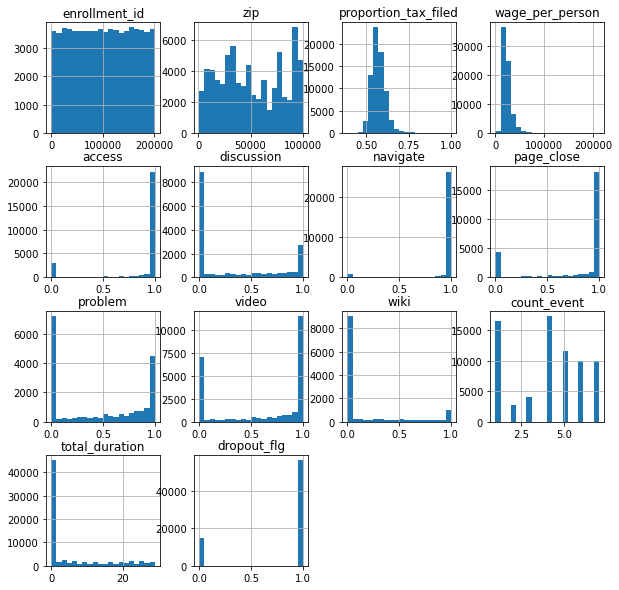

In [280]:
base_data.hist(bins=20,figsize=(10,10))

In [474]:
import numpy as np
# replace by mean since the distribution is close to normal
base_data['wage_per_person'].fillna(np.mean(base_data['wage_per_person']),inplace=True)

C:\Users\Revathi P\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [475]:
base_data.isnull().sum()

enrollment_id               0
zip                         0
highest_education           0
ZipCodeType                 0
City                        0
proportion_tax_filed        0
wage_per_person             0
State_y                     0
access                  43921
discussion              55108
navigate                42983
page_close              44861
problem                 53239
video                   46721
wiki                    59406
count_event                 0
total_duration              0
dropout_flg              1000
dtype: int64

In [476]:
base_data.columns

Index(['enrollment_id', 'zip', 'highest_education', 'ZipCodeType', 'City',
       'proportion_tax_filed', 'wage_per_person', 'State_y', 'access',
       'discussion', 'navigate', 'page_close', 'problem', 'video', 'wiki',
       'count_event', 'total_duration', 'dropout_flg'],
      dtype='object')

In [477]:
base_data['access'].fillna(0,inplace=True)
base_data['discussion'].fillna(0,inplace=True)
base_data['navigate'].fillna(0,inplace=True)
base_data['page_close'].fillna(0,inplace=True)
base_data['problem'].fillna(0,inplace=True)
base_data['video'].fillna(0,inplace=True)
base_data['wiki'].fillna(0,inplace=True)

In [478]:
base_data.isna().sum()

enrollment_id              0
zip                        0
highest_education          0
ZipCodeType                0
City                       0
proportion_tax_filed       0
wage_per_person            0
State_y                    0
access                     0
discussion                 0
navigate                   0
page_close                 0
problem                    0
video                      0
wiki                       0
count_event                0
total_duration             0
dropout_flg             1000
dtype: int64

In [479]:
train_val_base_data=base_data[base_data['dropout_flg'].notnull()]

In [480]:
# perform correlation plot for numerical fields
train_val_base_data.columns

Index(['enrollment_id', 'zip', 'highest_education', 'ZipCodeType', 'City',
       'proportion_tax_filed', 'wage_per_person', 'State_y', 'access',
       'discussion', 'navigate', 'page_close', 'problem', 'video', 'wiki',
       'count_event', 'total_duration', 'dropout_flg'],
      dtype='object')

In [481]:
len(train_val_base_data)

71394

In [482]:
train_val_base_data_cont=train_val_base_data[['proportion_tax_filed','wage_per_person','access','discussion','navigate','page_close',\
                                             'problem','video','wiki','count_event','total_duration','dropout_flg']]

In [483]:
# Plotting the correlation matrix for the continuous features in the dataset
df_correlation = train_val_base_data_cont.corr(method = 'pearson')
df_correlation

,proportion_tax_filed,wage_per_person,access,discussion,navigate,page_close,problem,video,wiki,count_event,total_duration,dropout_flg
proportion_tax_filed,1.000000,0.086681,-0.000399,0.000576,-0.001840,-0.001376,0.003688,-0.000506,-0.007131,0.003401,-0.001796,-0.002205
wage_per_person,0.086681,1.000000,0.000511,0.002162,0.003110,0.002143,0.004712,0.006440,-0.004157,-0.003993,0.003972,0.000808
access,-0.000399,0.000511,1.000000,0.432081,0.846406,0.910462,0.572723,0.765768,0.282257,0.607376,0.746043,-0.459821
discussion,0.000576,0.002162,0.432081,1.000000,0.402486,0.425529,0.484230,0.419316,0.487317,0.407901,0.476427,-0.348315
navigate,-0.001840,0.003110,0.846406,0.402486,1.000000,0.777728,0.500101,0.651528,0.264468,0.560565,0.766036,-0.427161
page_close,-0.001376,0.002143,0.910462,0.425529,0.777728,1.000000,0.565085,0.816844,0.273593,0.587396,0.715046,-0.449449
problem,0.003688,0.004712,0.572723,0.484230,0.500101,0.565085,1.000000,0.560584,0.287745,0.460125,0.624924,-0.496406
video,-0.000506,0.006440,0.765768,0.419316,0.651528,0.816844,0.560584,1.000000,0.269154,0.529529,0.636735,-0.419046
wiki,-0.007131,-0.004157,0.282257,0.487317,0.264468,0.273593,0.287745,0.269154,1.000000,0.279533,0.291954,-0.217124
count_event,0.003401,-0.003993,0.607376,0.407901,0.560565,0.587396,0.460125,0.529529,0.279533,1.000000,0.539009,-0.383601


<AxesSubplot:>

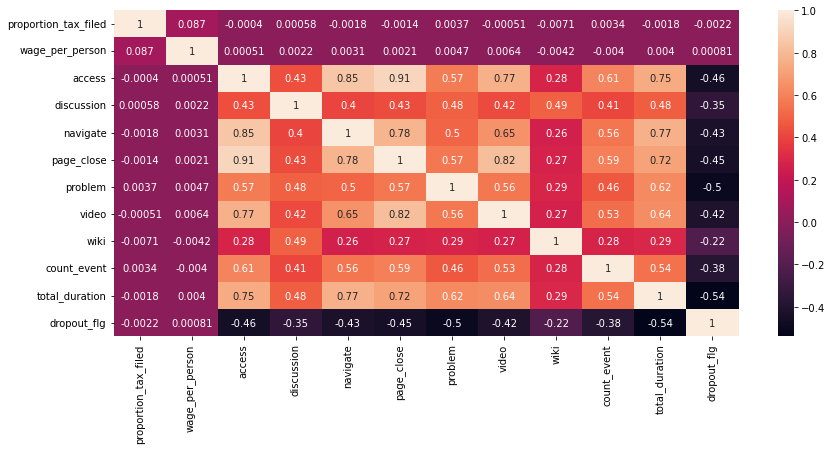

In [484]:
import seaborn as sns
%matplotlib inline
# Plotting the correlation matrix for the continuous features in the dataset
# plot the heatmap
fig, ax = plt.subplots(figsize=(14,6)) 
sns.heatmap(df_correlation,annot=True, 
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns)

In [485]:
# eliminating proportion_tax_filed and wage_per person based on this
# anova test would have been perform, but i couldn;t do it because of time constraints
base_data=base_data.drop(['proportion_tax_filed','wage_per_person'],axis=1)

In [486]:
train_val_base_data_cont.columns

Index(['proportion_tax_filed', 'wage_per_person', 'access', 'discussion',
       'navigate', 'page_close', 'problem', 'video', 'wiki', 'count_event',
       'total_duration', 'dropout_flg'],
      dtype='object')

In [488]:
# categorical fields

# Finding dependency with the target variable using chi-squared test statistics
cols=['zip','highest_education','ZipCodeType','City','State_y']
for i in train_val_base_data[cols]:
    data_interim=train_val_base_data[[i, 'dropout_flg']]

    data_cont=pd.crosstab(data_interim[i],data_interim['dropout_flg'])

    from scipy.stats import chi2_contingency
    stat, p, dof, expected = chi2_contingency(data_cont)

    #-----------interpret p-value
    alpha = 0.05
    print(i,p,p<alpha)

zip 3.298887211731411e-10 True
highest_education 1.8510805154157207e-127 True
ZipCodeType 0.6327618385948717 False
City 1.1632951037789963e-07 True
State_y 0.11802004907540227 False


In [304]:
# columns zipcode type, state is eliminated based on chisquared test

In [489]:
base_data.drop(['ZipCodeType','State_y'],axis=1,inplace=True)

In [490]:
base_data.columns

Index(['enrollment_id', 'zip', 'highest_education', 'City', 'access',
       'discussion', 'navigate', 'page_close', 'problem', 'video', 'wiki',
       'count_event', 'total_duration', 'dropout_flg'],
      dtype='object')

array([[<AxesSubplot:title={'center':'enrollment_id'}>,
        <AxesSubplot:title={'center':'zip'}>,
        <AxesSubplot:title={'center':'access'}>],
       [<AxesSubplot:title={'center':'discussion'}>,
        <AxesSubplot:title={'center':'navigate'}>,
        <AxesSubplot:title={'center':'page_close'}>],
       [<AxesSubplot:title={'center':'problem'}>,
        <AxesSubplot:title={'center':'video'}>,
        <AxesSubplot:title={'center':'wiki'}>],
       [<AxesSubplot:title={'center':'count_event'}>,
        <AxesSubplot:title={'center':'total_duration'}>,
        <AxesSubplot:title={'center':'dropout_flg'}>]], dtype=object)

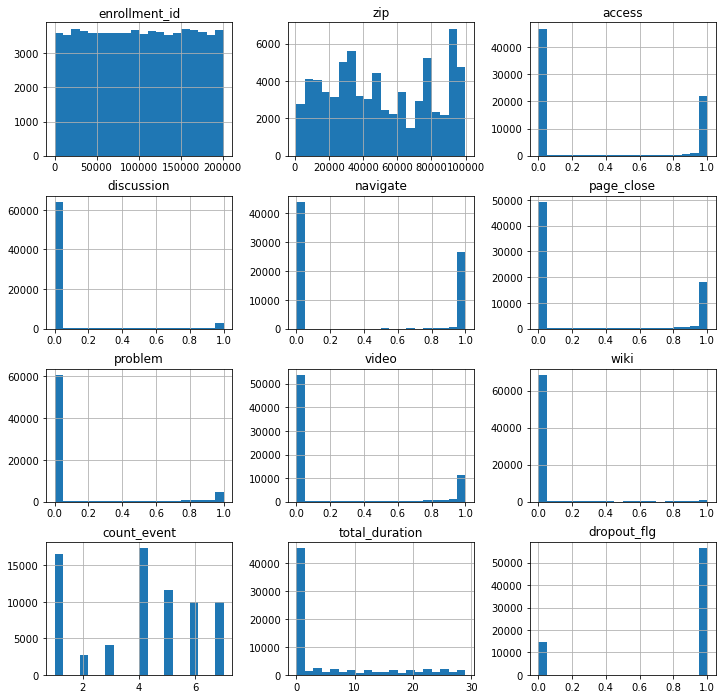

In [309]:
base_data.hist(bins=20,figsize=(12,12))

In [492]:
# dropping enrollment as it is not a valid feature
base_data.drop('enrollment_id',axis=1,inplace=True)

In [493]:
train_val_base_data.groupby('zip')['dropout_flg'].sum().reset_index(name='dropout').sort_values(by='dropout',ascending=False).describe()

,zip,dropout
count,15848.000000,15848.000000
mean,49045.832471,3.569599
std,28474.943193,3.435872
min,1001.000000,0.000000
25%,27105.750000,1.000000
50%,46784.500000,2.000000
75%,74857.500000,5.000000
max,99901.000000,28.000000


array([[<AxesSubplot:title={'center':'zip'}>,
        <AxesSubplot:title={'center':'dropout'}>]], dtype=object)

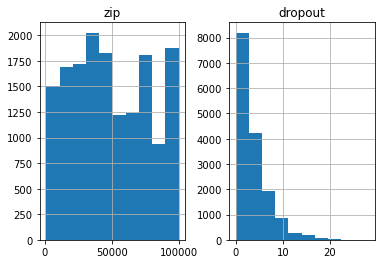

In [494]:
train_val_base_data.groupby('zip')['dropout_flg'].sum().reset_index(name='dropout').sort_values(by='dropout',ascending=False).hist(bins=10)

In [316]:
def drop_out_zips(x):
    if x <=0:
        return 1
    elif x <= 2:
        return 2
    else:
        return 3

In [500]:
len(train_val_base_data)

71394

In [495]:
zip_dropout=train_val_base_data.groupby('zip')['dropout_flg'].sum().reset_index(name='dropout')

In [496]:
zip_dropout['zip_dropout']=zip_dropout['dropout'].apply(drop_out_zips)

In [504]:
base_data=pd.merge(base_data,zip_dropout,on='zip',how='left')

In [505]:
base_data.isnull().sum()

zip                     0
highest_education       0
City                    0
access                  0
discussion              0
navigate                0
page_close              0
problem                 0
video                   0
wiki                    0
count_event             0
total_duration          0
dropout_flg          1000
dropout                60
zip_dropout            60
dtype: int64

In [506]:
base_data['zip_dropout'].fillna(0,inplace=True)

In [507]:
# dropping zipcode
base_data.drop(['zip','dropout'],axis=1,inplace=True)

In [508]:
base_data.drop('City',axis=1,inplace=True)

In [509]:
base_data.columns

Index(['highest_education', 'access', 'discussion', 'navigate', 'page_close',
       'problem', 'video', 'wiki', 'count_event', 'total_duration',
       'dropout_flg', 'zip_dropout'],
      dtype='object')

In [513]:
base_data.isna().sum()

access                                0
discussion                            0
navigate                              0
page_close                            0
problem                               0
video                                 0
wiki                                  0
count_event                           0
total_duration                        0
dropout_flg                        1000
zip_dropout                           0
highest_education_college             0
highest_education_graduate            0
highest_education_highschool          0
highest_education_missing             0
highest_education_no highschool       0
highest_education_some college        0
dtype: int64

In [510]:
# Encoding categorical features

In [511]:
# One hot encoding

In [512]:
base_data = pd.get_dummies(base_data, columns = ['highest_education'])

In [514]:
# Label Encoding
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

base_data['zip_dropout']=label_encoder.fit_transform(base_data['zip_dropout'])

In [515]:
base_data.head(2)

,access,discussion,navigate,page_close,problem,video,wiki,count_event,total_duration,dropout_flg,zip_dropout,highest_education_college,highest_education_graduate,highest_education_highschool,highest_education_missing,highest_education_no highschool,highest_education_some college
0,1.000000,0.000000,1.0,1.000000,0.529412,0.647059,0.0,5,17,0.0,3,0,0,0,0,0,1
1,0.931034,0.724138,1.0,0.931034,0.931034,0.931034,0.0,6,29,0.0,3,0,0,1,0,0,0


In [516]:
base_data.drop('highest_education_missing',axis=1,inplace=True)

In [517]:
# Data Scaling

In [518]:
## Range Normalization

for col in base_data.columns:
    x = base_data[col].unique()

In [519]:
# Range normalisation

# apply normalization techniques
for column in base_data.columns:
    base_data[column] = (base_data[column] - base_data[column].min()) / (base_data[column].max() - base_data[column].min())

# view normalized data
base_data.head(2)

,access,discussion,navigate,page_close,problem,video,wiki,count_event,total_duration,dropout_flg,zip_dropout,highest_education_college,highest_education_graduate,highest_education_highschool,highest_education_no highschool,highest_education_some college
0,1.000000,0.000000,1.0,1.000000,0.529412,0.647059,0.0,0.666667,0.586207,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.931034,0.724138,1.0,0.931034,0.931034,0.931034,0.0,0.833333,1.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [614]:
# Resampling

drop_out = train_val_base_data.loc[train_val_base_data['dropout_flg'] == 1]
no_drop_out = train_val_base_data.loc[train_val_base_data['dropout_flg'] == 0]

print('Count of dropout:', len(drop_out))
print('Count of non-dropout:', len(no_drop_out))

Count of dropout: 56571
Count of non-dropout: 14823


In [521]:
train_val_base_data=base_data[base_data['dropout_flg'].notnull()]

In [522]:
X = train_val_base_data.drop(labels='dropout_flg', axis=1)
y = train_val_base_data[['dropout_flg']]

In [523]:
from imblearn.over_sampling import SMOTE
su = SMOTE(random_state=42)

In [524]:
X_su, y_su = su.fit_resample(X, y)

In [525]:
#combining 2 datasets 
df2 = pd.concat([X_su, y_su])
print(df2['dropout_flg'].value_counts())

0.0    56571
1.0    56571
Name: dropout_flg, dtype: int64


<AxesSubplot:ylabel='Type'>

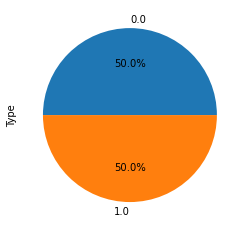

In [526]:
#plotting piechart after resampling
y_su.groupby('dropout_flg').size().plot(kind='pie',
                                       y = 'drop_out',
                                       label = "Type",
                                       autopct='%1.1f%%')

In [527]:
# splitting the dataset into training and testing set

from sklearn.model_selection import train_test_split

xtrain, xval, ytrain, yval = train_test_split(X_su, y_su, stratify=y_su,train_size=.70, random_state= 42)

print(f'Training dataset : {xtrain.shape} {ytrain.shape}') # dimension of train set
print(f'Testing dataset : {xval.shape}, {xval.shape}') # dimension of test set

Training dataset : (79199, 15) (79199, 1)
Testing dataset : (33943, 15), (33943, 15)


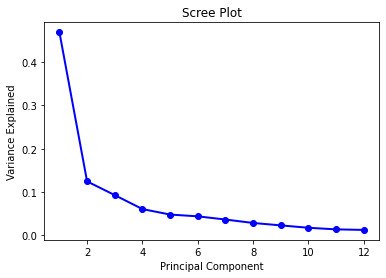

In [528]:
# Plotting scree plot to decide the number of principle components required
# Experiment on whether standardization or normalization for PCA (mostly they use both, but need to read more)
from sklearn.decomposition import PCA
pca = PCA(n_components=12)

#fit PCA model to data
pca_fit = pca.fit(xtrain)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [529]:
# 7 components are selected based on observation from screeplot
# This will consider 7 principle components from the dataframe which can further be used for modelling
pca = PCA(n_components=7)
X_train = pca.fit_transform(xtrain)
X_val = pca.transform(xval)

In [530]:
xtest=base_data[base_data['dropout_flg'].isnull()]

In [531]:
xtest.drop('dropout_flg',axis=1,inplace=True)

C:\Users\Revathi P\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [532]:
X_test = pca.transform(xtest)

In [533]:
print(f'Training dataset : {X_train.shape} {ytrain.shape}') # dimension of train set
print(f'Testing dataset : {X_val.shape}, {yval.shape}') # dimension of test set

Training dataset : (79199, 7) (79199, 1)
Testing dataset : (33943, 7), (33943, 1)


In [534]:
# Modelling

In [535]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,ytrain)
# clf.fit(xtrain,ytrain)

y_pred=clf.predict(X_val)
# y_pred=clf.predict(xval)

C:\Users\REVATH~1\AppData\Local\Temp/ipykernel_17188/1738254996.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,ytrain)


In [536]:
# Classification Report
from sklearn.metrics import classification_report

print(classification_report(yval, y_pred, target_names=['drop_out','no_drop_out']))

              precision    recall  f1-score   support

    drop_out       0.85      0.77      0.81     16972
 no_drop_out       0.79      0.87      0.83     16971

    accuracy                           0.82     33943
   macro avg       0.82      0.82      0.82     33943
weighted avg       0.82      0.82      0.82     33943



In [537]:
# Hyperparameter tuning
# Using GridsearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

clf=RandomForestClassifier(n_estimators=100)
ss = StratifiedShuffleSplit(n_splits=3, test_size=0.5, random_state=0)
params = [{'criterion':["gini","entropy"],"max_depth":[5,6,7,8,9,10,11,12],"class_weight":["balanced"],"random_state":[18]\
          ,"max_features":['sqrt','log2']}]
GSCV = GridSearchCV(clf,params,scoring="roc_auc",cv=ss)
GSCV.fit(X_train,ytrain)
GSCV.best_params_
best_model = GSCV.best_estimator_

C:\Users\Revathi P\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Revathi P\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Revathi P\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Revathi P\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A co

C:\Users\Revathi P\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Revathi P\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Revathi P\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Revathi P\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A co

C:\Users\Revathi P\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Revathi P\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Revathi P\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Revathi P\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A co

C:\Users\Revathi P\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Revathi P\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Revathi P\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Revathi P\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A co

In [538]:
GSCV.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'sqrt',
 'random_state': 18}

In [539]:
from sklearn.metrics import roc_curve

preds = best_model.predict_proba(X_train)[:,1]

fpr, tpr, thresholds = roc_curve(ytrain, preds)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
y_pred = (GSCV.predict_proba(X_val)[:,1] >= optimal_threshold).astype(bool)

In [540]:
optimal_threshold

0.4534454337396472

In [541]:
# Classification Report
from sklearn.metrics import classification_report

print(classification_report(yval, y_pred, target_names=['drop_out','no_drop_out']))

              precision    recall  f1-score   support

    drop_out       0.84      0.75      0.80     16972
 no_drop_out       0.78      0.86      0.82     16971

    accuracy                           0.81     33943
   macro avg       0.81      0.81      0.81     33943
weighted avg       0.81      0.81      0.81     33943



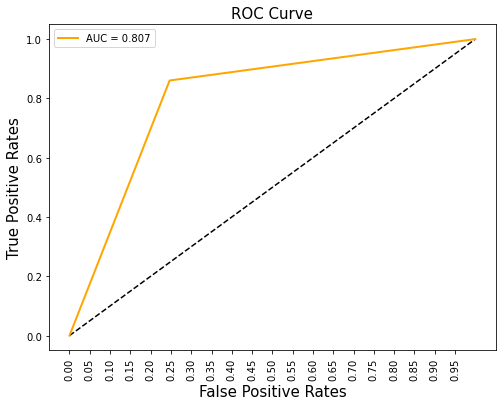

In [542]:
# Importing the required metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

#defining roc curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label,color='orange')
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    
    plt.show()

#plotting ROC curve
fpr, tpr, threshold = roc_curve(yval, y_pred)
knn_auc = roc_auc_score(yval, y_pred)
plot_roc_curve(fpr, tpr, 'AUC = %.3f' % knn_auc)

In [543]:
# Finding the test predictions and saving to test set
from sklearn.metrics import roc_curve

preds = best_model.predict_proba(X_train)[:,1]

fpr, tpr, thresholds = roc_curve(ytrain, preds)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
y_pred = (GSCV.predict_proba(X_test)[:,1] >= optimal_threshold).astype(bool)

In [544]:
len(X_test)

1000

In [545]:
test['dropout_flg']=y_pred

In [546]:
test.to_csv('test.csv')

In [547]:
# XGBoost
from xgboost import XGBClassifier
clf = XGBClassifier(booster='gbtree',n_estimators=100,random_state=0)
clf.fit(X_train, ytrain)
y_pred=clf.predict(X_val)

In [549]:
# Classification Report
from sklearn.metrics import classification_report

print(classification_report(yval, y_pred, target_names=['drop_out','no_drop_out']))

              precision    recall  f1-score   support

    drop_out       0.82      0.77      0.79     16972
 no_drop_out       0.78      0.84      0.81     16971

    accuracy                           0.80     33943
   macro avg       0.80      0.80      0.80     33943
weighted avg       0.80      0.80      0.80     33943



In [550]:
# Using GridsearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

ss = StratifiedShuffleSplit(n_splits=3, test_size=0.5, random_state=0)
clf = XGBClassifier(booster='gbtree',n_estimators=100,random_state=0)
params = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
GSCV = GridSearchCV(clf,params,scoring="roc_auc",cv=ss)
GSCV.fit(X_train,ytrain)
GSCV.best_params_
best_model = GSCV.best_estimator_

In [551]:
GSCV.best_params_

{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 180}

In [552]:
from sklearn.metrics import roc_curve

preds = best_model.predict_proba(X_train)[:,1]

fpr, tpr, thresholds = roc_curve(ytrain, preds)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
y_pred = (GSCV.predict_proba(X_val)[:,1] >= optimal_threshold).astype(bool)

In [553]:
optimal_threshold

0.45853248

In [555]:
# Classification Report
from sklearn.metrics import classification_report

print(classification_report(yval, y_pred, target_names=['drop_out','no_drop_out']))

              precision    recall  f1-score   support

    drop_out       0.85      0.75      0.80     16972
 no_drop_out       0.78      0.86      0.82     16971

    accuracy                           0.81     33943
   macro avg       0.81      0.81      0.81     33943
weighted avg       0.81      0.81      0.81     33943



In [ ]:
# Importing the required metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

#defining roc curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label,color='orange')
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    
    plt.show()

#plotting ROC curve
fpr, tpr, threshold = roc_curve(yval, y_pred)
knn_auc = roc_auc_score(ytest, y_pred)
plot_roc_curve(fpr, tpr, 'AUC = %.3f' % knn_auc)
